# Prediction using Supervised ML

## Author - Neha Savakhande

## Problem Statement
● Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

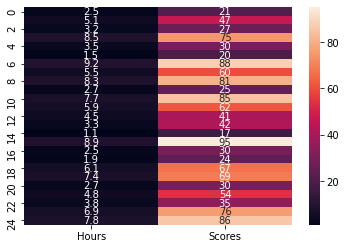

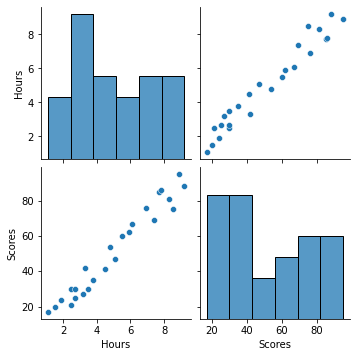

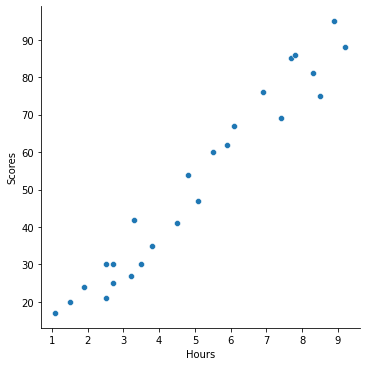

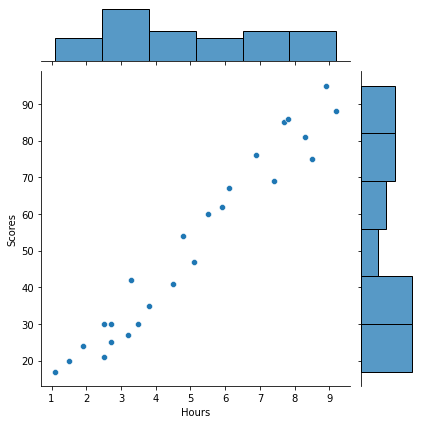

In [5]:
# Correaltion, Heatmap
student_corr= df.corr()
sns.heatmap(df, annot= True)
sns.pairplot(df)
sns.relplot(x="Hours", y="Scores", data= df)
sns.jointplot(x="Hours", y="Scores", data= df)

## Scatter Plot

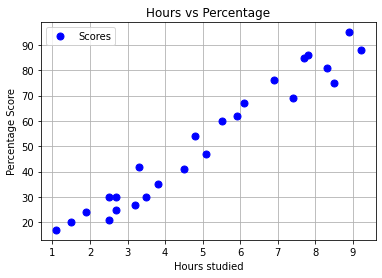

In [6]:
df.plot(x='Hours',y='Scores',style='o',color='blue',markersize=7)
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### We can clearly see that there is a linear positive relationship between hours studied and percentage score.

## Preparing the data

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.20, random_state = 0)

## Training the algorithm

In [9]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed.")

Training completed.


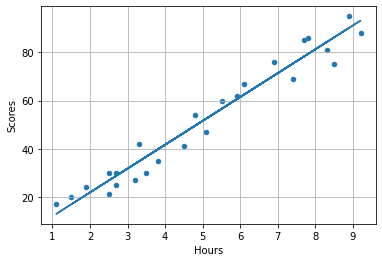

In [10]:
## Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

df.plot.scatter(x="Hours",y="Scores")
plt.plot(X, line);
plt.grid()
plt.show()

## Predicting the score

In [11]:
# Testing data- In hours
print(X_test) 

#predicting the score
y_pred= regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
df_compare = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
df_compare

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


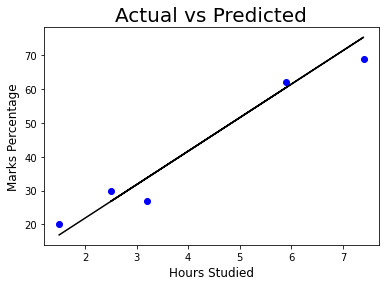

In [13]:
plt.scatter(x=X_test, y=y_test, color='blue')
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [14]:
hrs=9.25
pred=regressor.predict([[hrs]])
print(f'A student who studies for {hrs} hours will get approximately {pred[0]} marks')

A student who studies for 9.25 hours will get approximately 93.69173248737538 marks


## Evaluating the model

In [15]:
# Here we will be using mean absolute error method as a metric for evaluation
from sklearn import metrics
print("The Mean absolute error is:",metrics.mean_absolute_error(y_test,y_pred))

The Mean absolute error is: 4.183859899002975
